In [1]:
%matplotlib nbagg

In [2]:
from scipy.io import loadmat
from sklearn.decomposition import *
from sklearn.manifold import *
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle, islice
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


In [26]:
Z = loadmat('allglass.mat')['Z']
truth = loadmat('2glass_mask.mat')['BW']

This is a notebook to look at the different decomposition algorithms.

In [4]:
def plot_class(y):
    
    plt.figure()

    colors2 = np.array(list(islice(cycle(['r','b', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(truth.squeeze()) + 1))))

    colors2 = np.append(colors2, ["#000000"])
    plt.scatter(y[:,0],y[:,1], s=10, color=colors2[truth.squeeze()])
    
def plot_class3(y):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors2 = np.array(list(islice(cycle(['r','b', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(truth.squeeze()) + 1))))

    colors2 = np.append(colors2, ["#000000"])
    ax.scatter(y[:,0],y[:,1],y[:,2], color=colors2[truth.squeeze()])

## t-SNE

In [6]:
Ztsne = TSNE(n_components=3).fit_transform(Z)

<IPython.core.display.Javascript object>


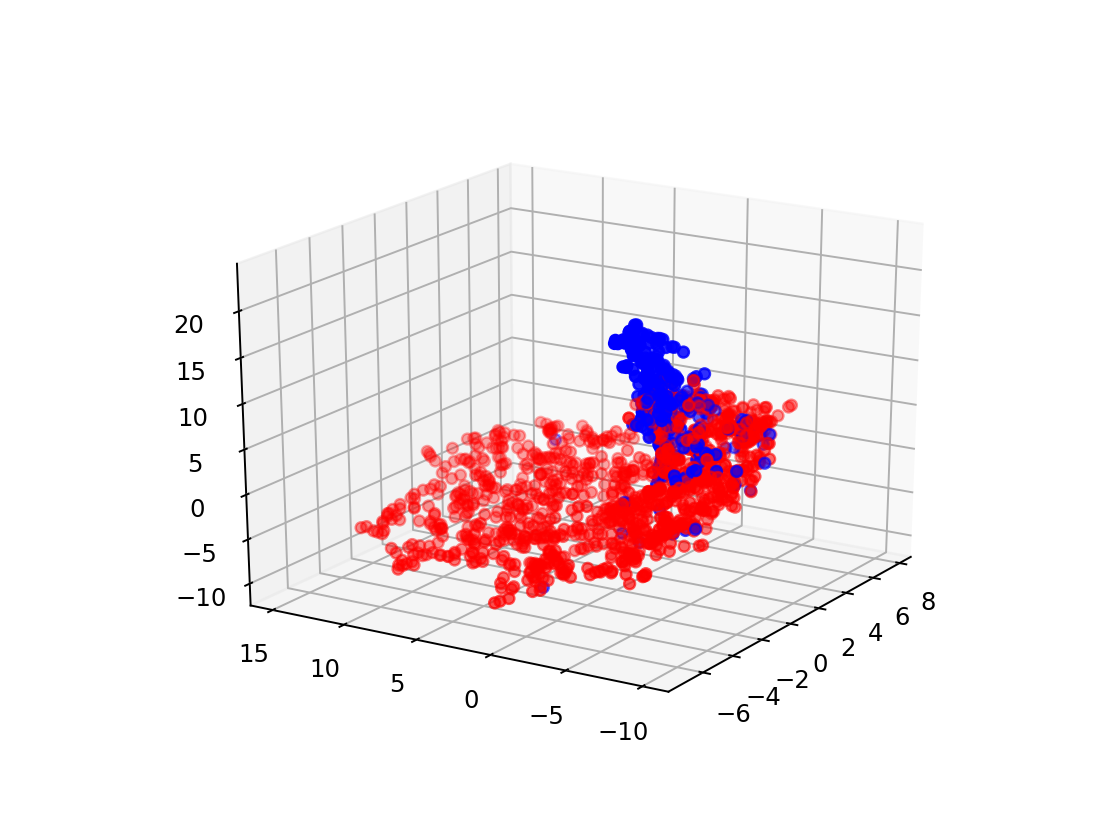

In [7]:
plot_class3(Ztsne)

## PCA

<IPython.core.display.Javascript object>


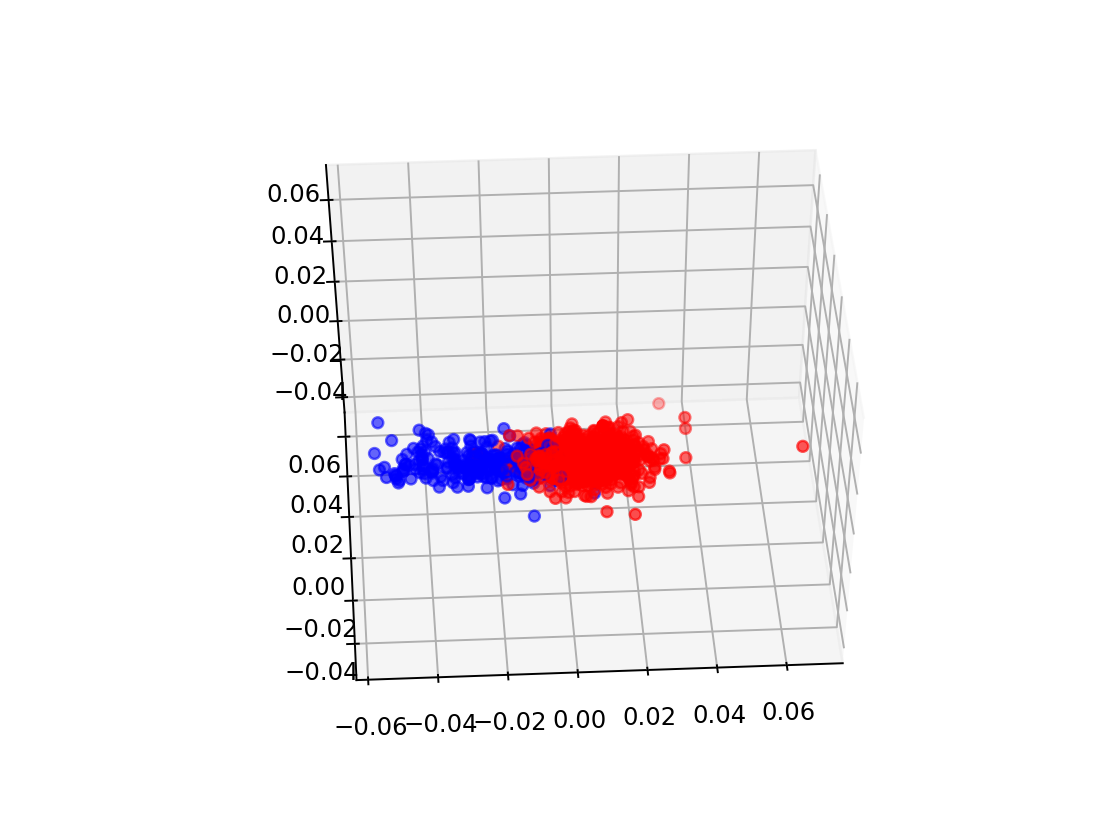

In [5]:
Zpca = PCA(n_components=3).fit_transform(Z)
plot_class3(Zpca)

<IPython.core.display.Javascript object>


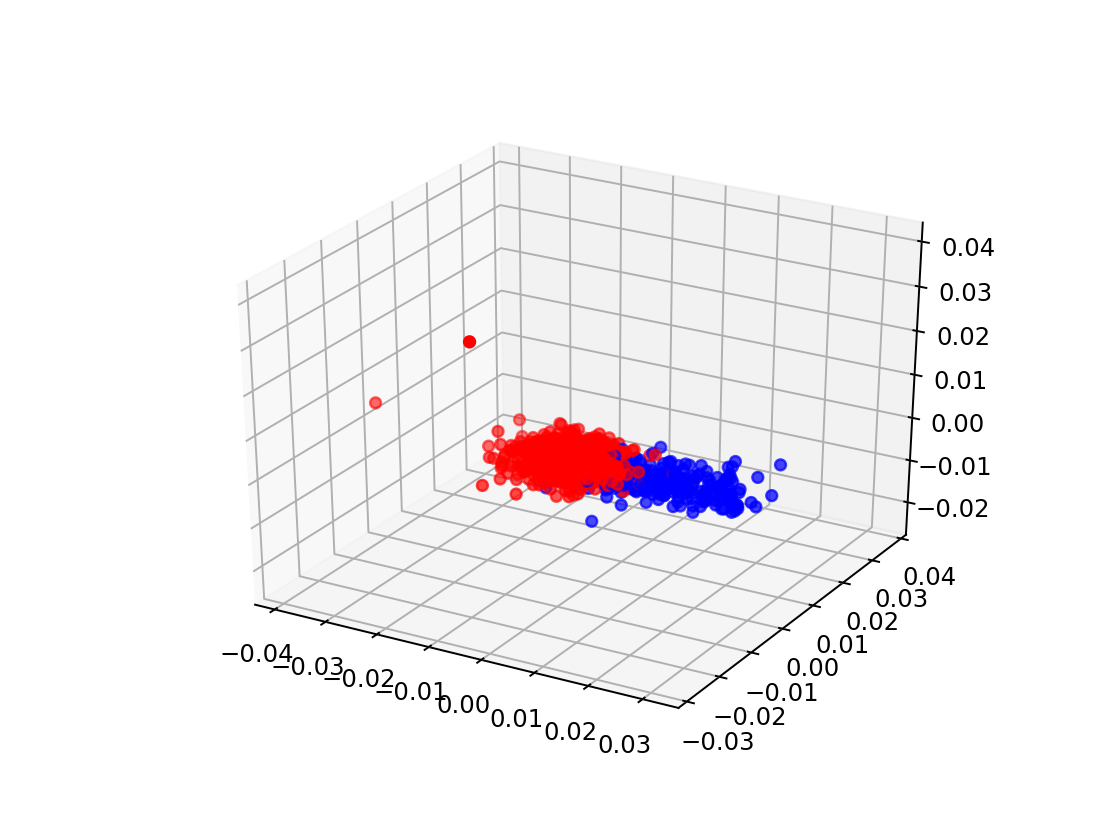

In [9]:
n_components = 3
Zpca2 = KernelPCA(n_components,kernel='rbf').fit_transform(Z)
plot_class3(Zpca2)

<IPython.core.display.Javascript object>


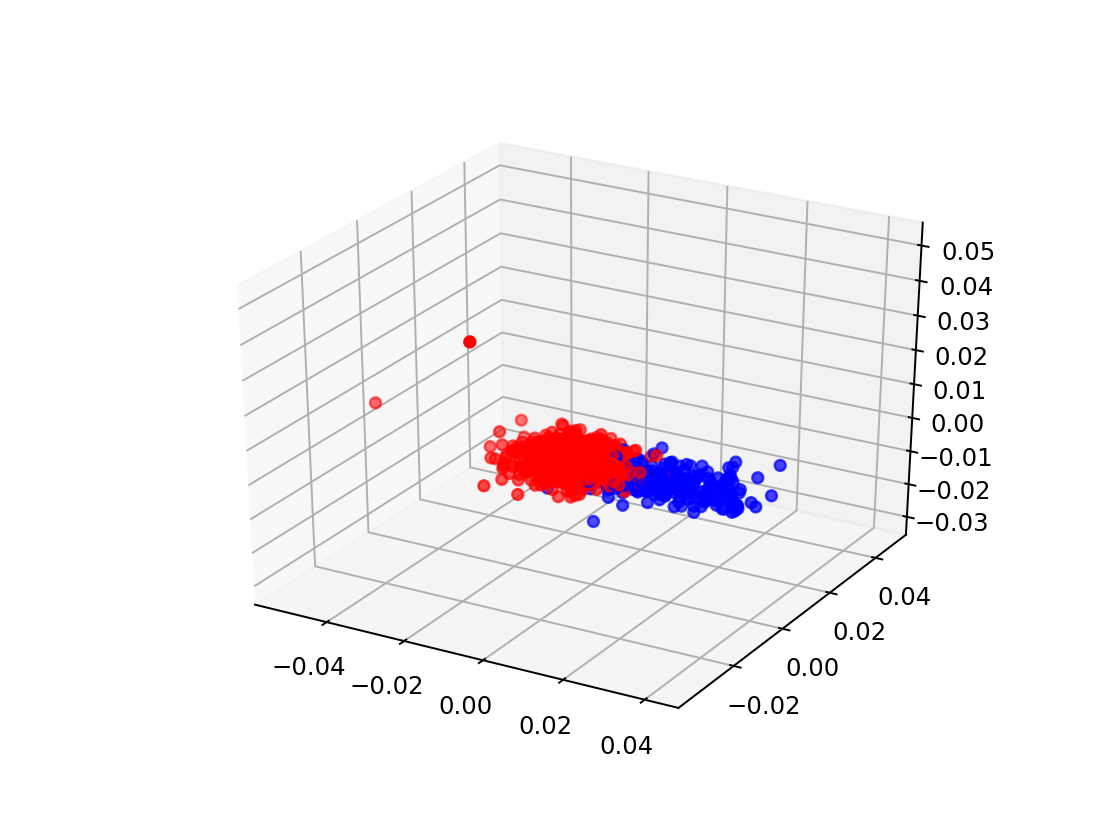

In [10]:
Zpca2 = KernelPCA(n_components,kernel='poly').fit_transform(Z)
plot_class3(Zpca2)

/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


<IPython.core.display.Javascript object>


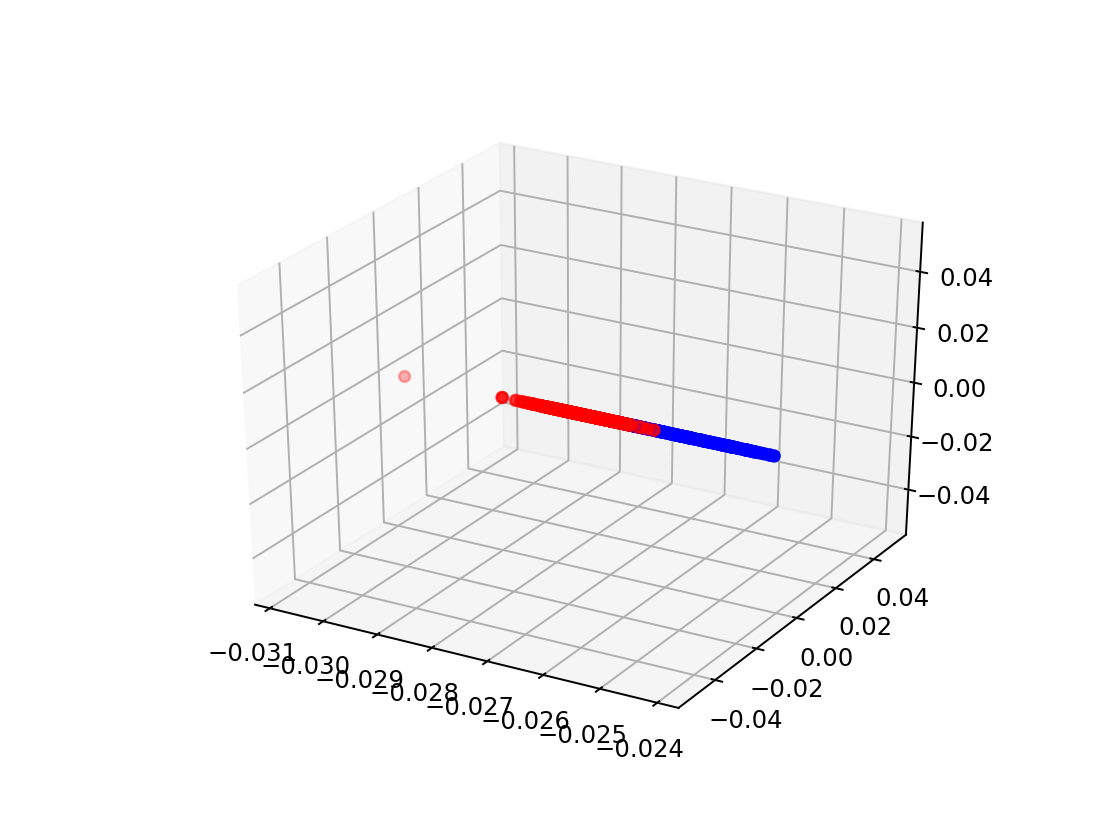

In [11]:
Zpca3 = SparsePCA(n_components=3).fit_transform(Z)
plot_class3(Zpca3)

<IPython.core.display.Javascript object>


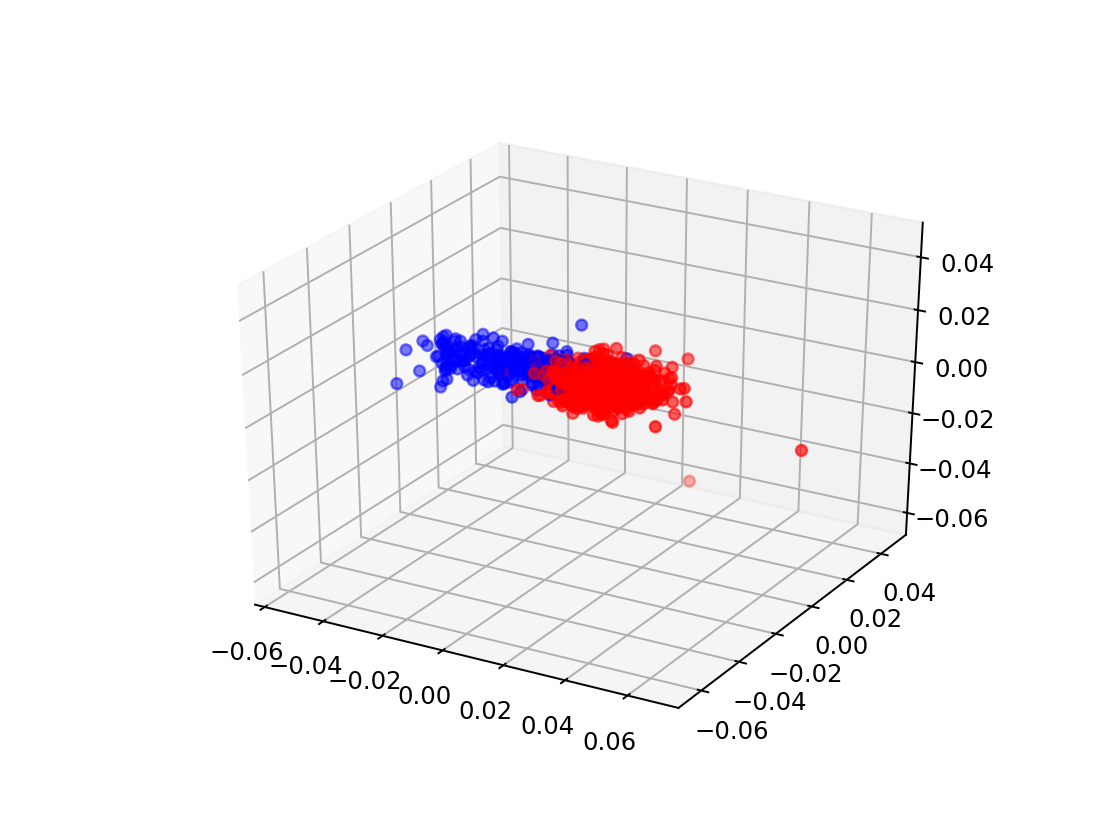

In [12]:
Zpca4 = IncrementalPCA(n_components).fit_transform(Z)
plot_class3(Zpca4)

## Factor Analysis

<IPython.core.display.Javascript object>


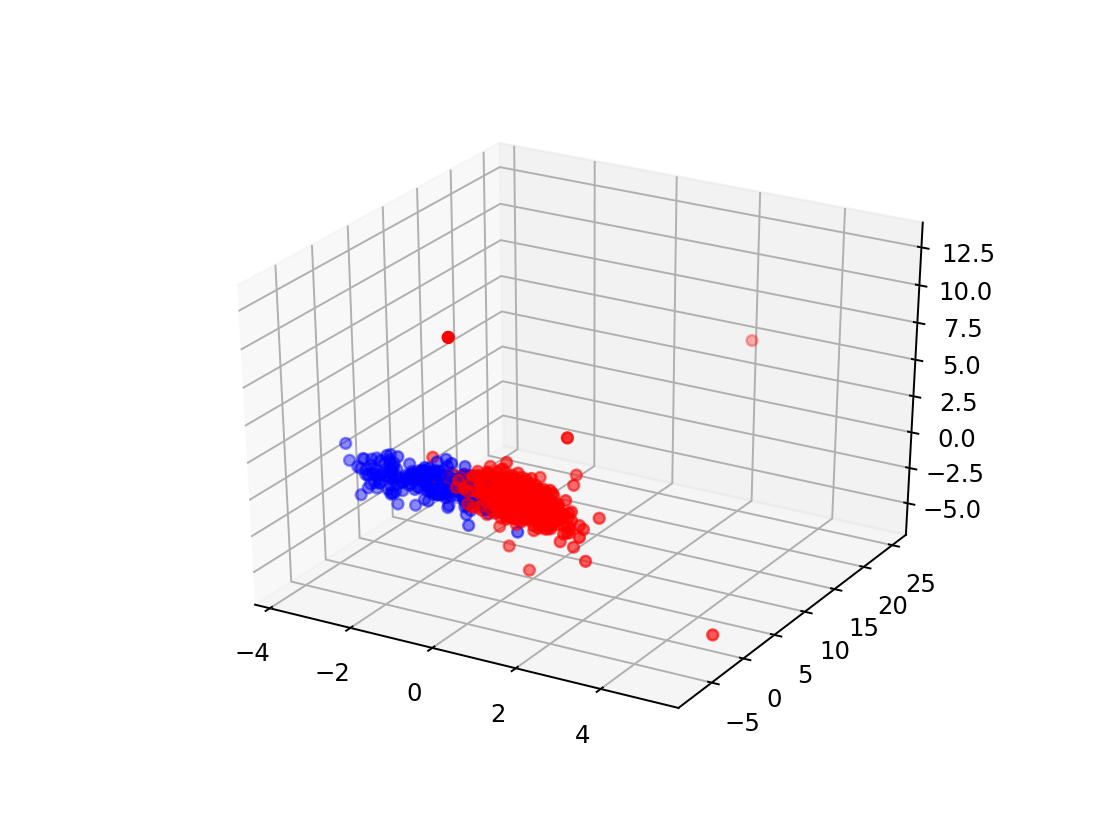

In [13]:
Zfa = FactorAnalysis(n_components=3).fit_transform(Z)
plot_class3(Zfa)

<IPython.core.display.Javascript object>


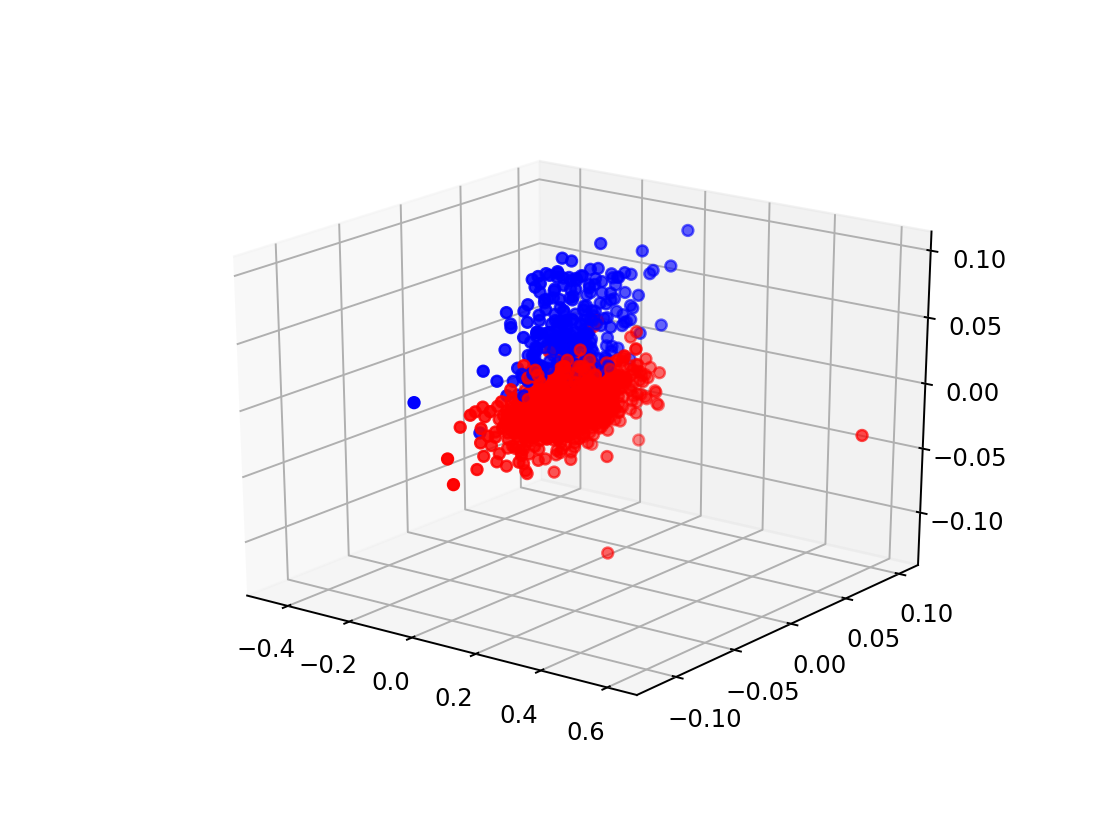

In [14]:
Zica = FastICA(n_components=3).fit_transform(Z)
plot_class3(Zica)

<IPython.core.display.Javascript object>


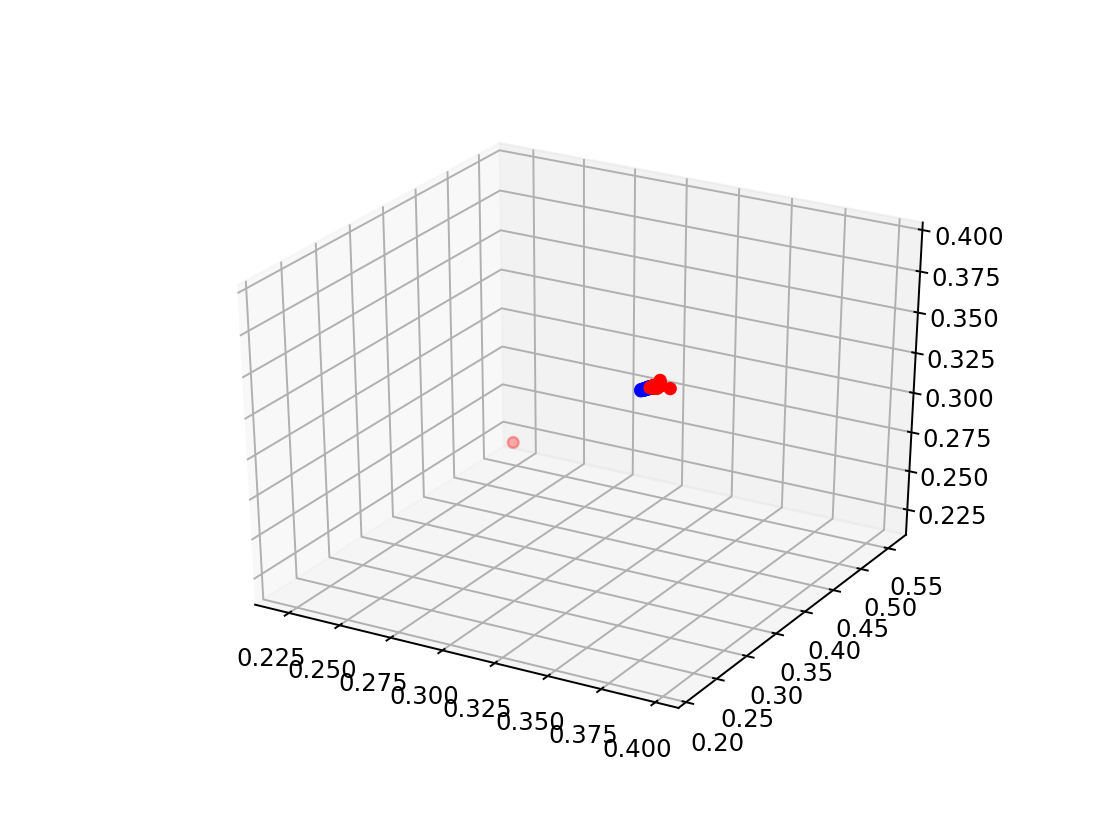

In [15]:
Zlda = LatentDirichletAllocation(n_components=3).fit_transform(Z)
plot_class3(Zlda)

<IPython.core.display.Javascript object>


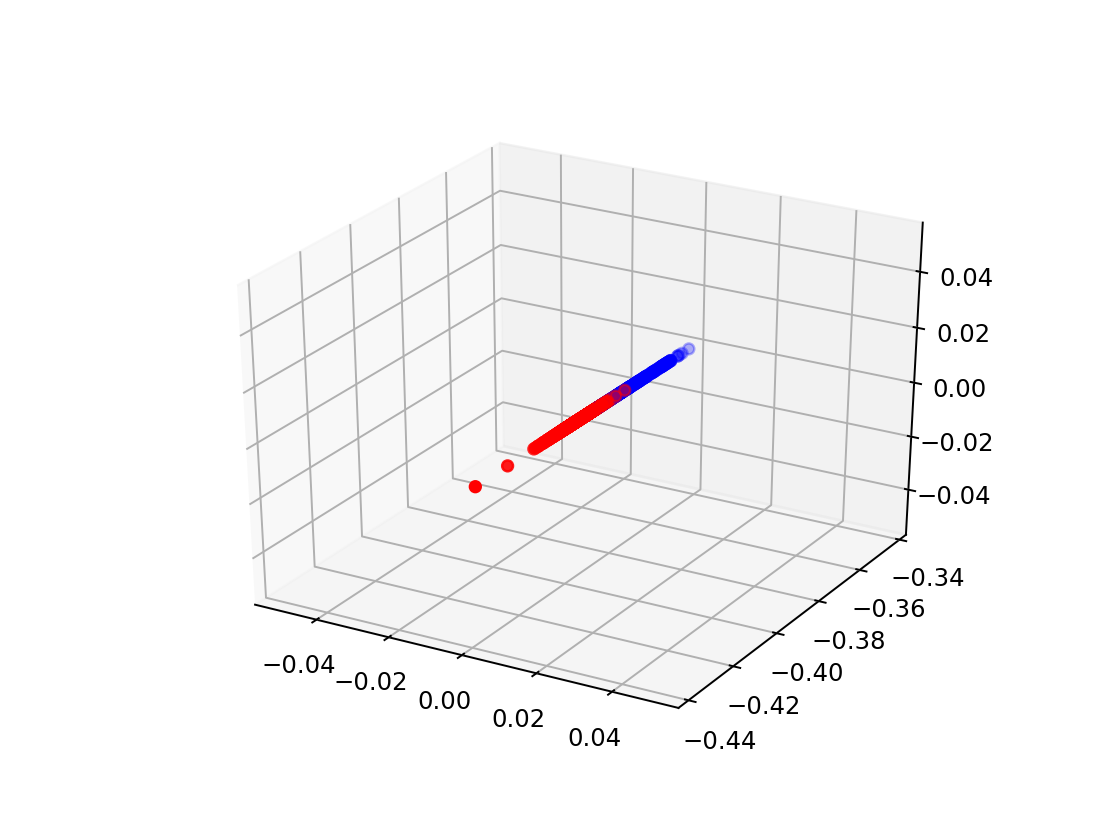

In [16]:
Zmbd = MiniBatchDictionaryLearning(n_components=3).fit_transform(Z)
plot_class3(Zmbd)

<IPython.core.display.Javascript object>


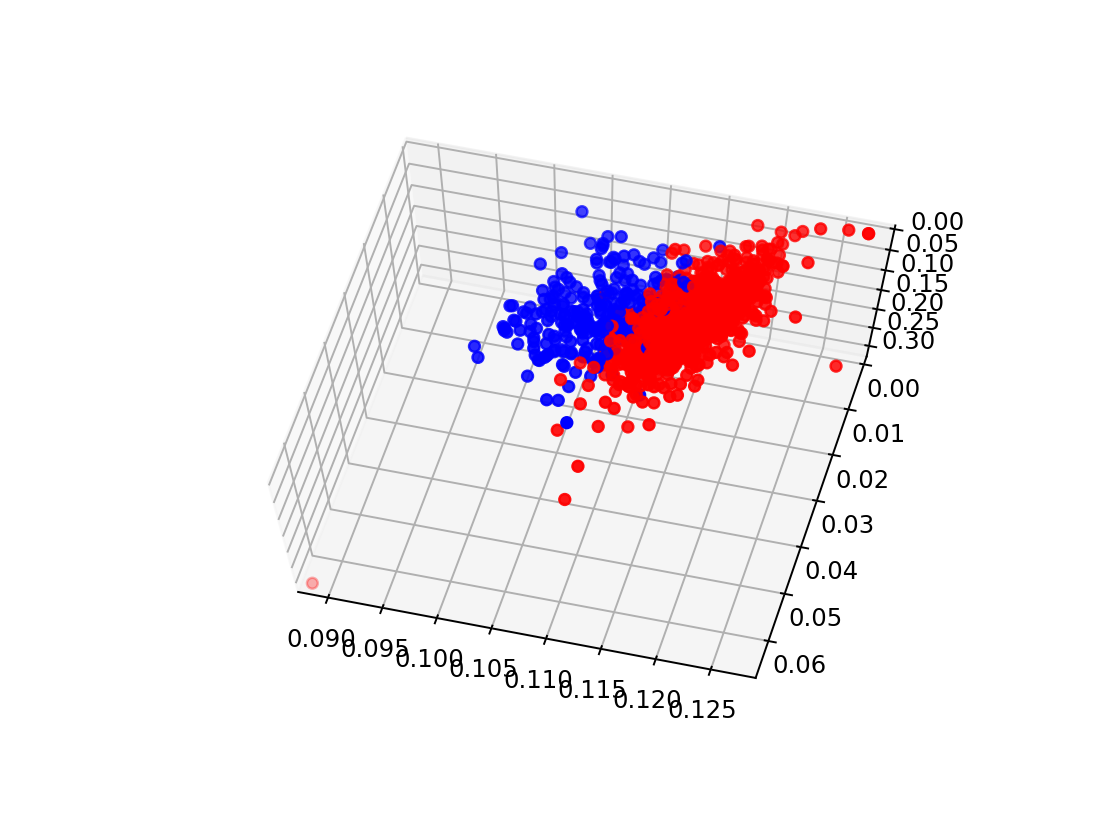

In [17]:
Znmf = NMF(n_components=3).fit_transform(Z)
plot_class3(Znmf)

<IPython.core.display.Javascript object>


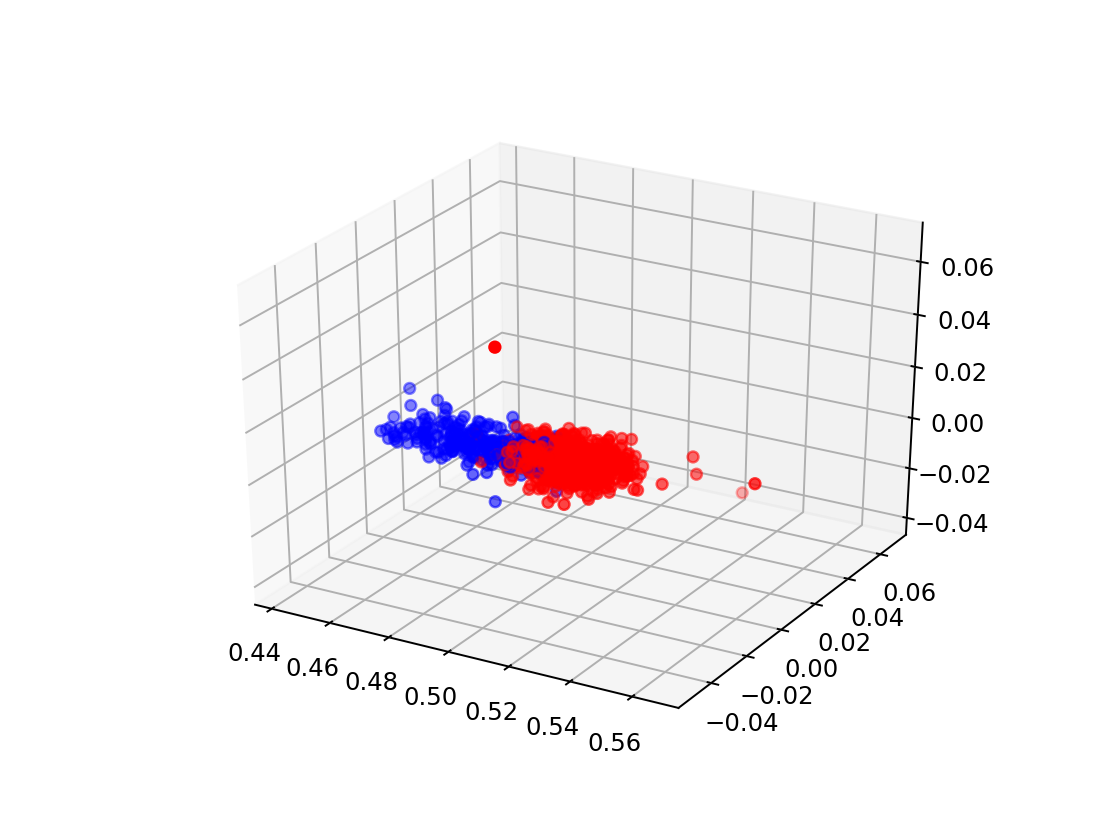

In [18]:
Zsparse = TruncatedSVD(n_components=3).fit_transform(Z)
plot_class3(Zsparse)

## Manifold methods

In [28]:
Z = loadmat('allsteel.mat')['Z']
truth = loadmat('2steel_mask.mat')['BW']

<IPython.core.display.Javascript object>


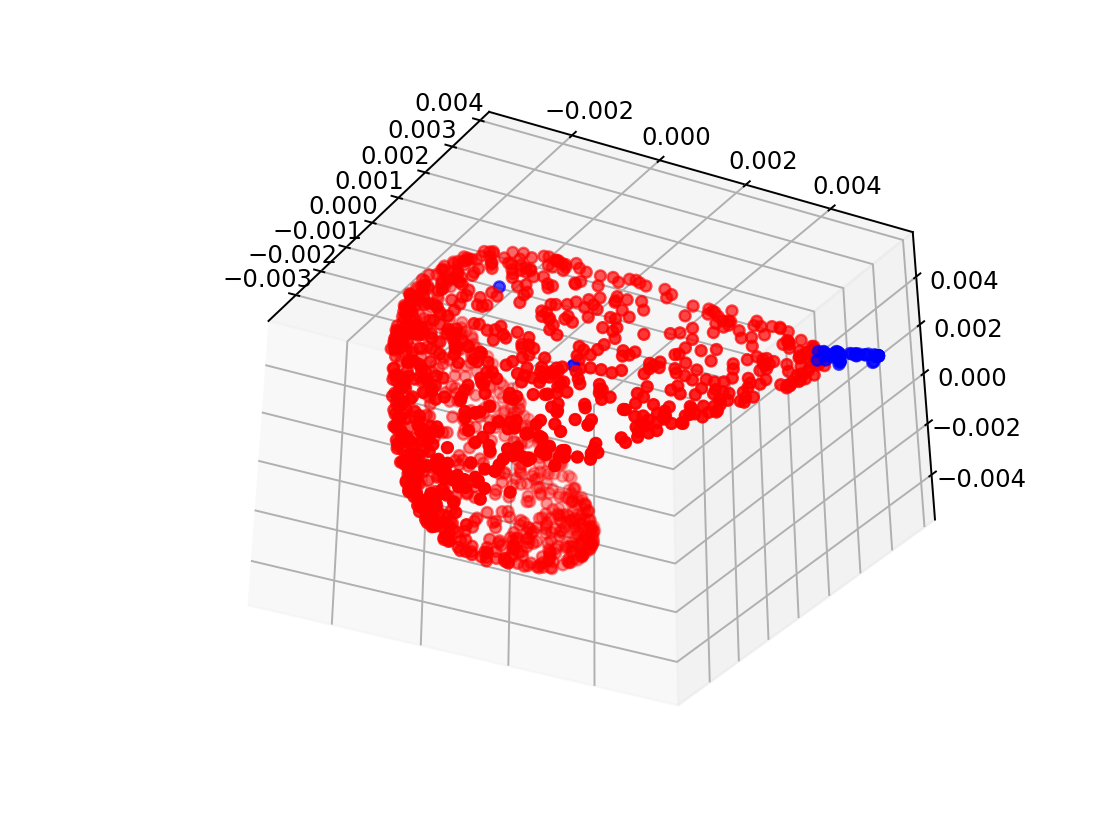

In [29]:
Zse = SpectralEmbedding(n_components=3).fit_transform(Z)
plot_class3(Zse)

<IPython.core.display.Javascript object>


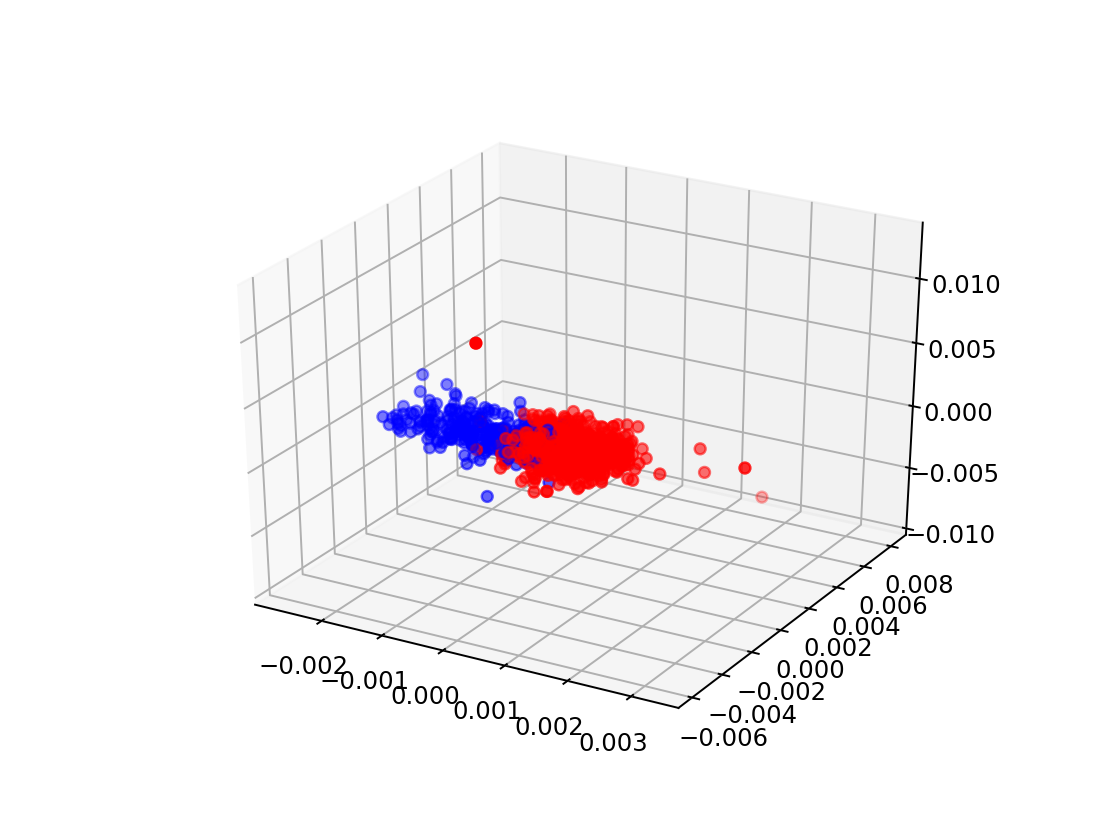

In [20]:
Zse = SpectralEmbedding(n_components=3,affinity='rbf').fit_transform(Z)
plot_class3(Zse)

In [ ]:
Zse = SpectralEmbedding(n_components=3,affinity='rbf').fit_transform(Z)
plot_class3(Zse)

<IPython.core.display.Javascript object>


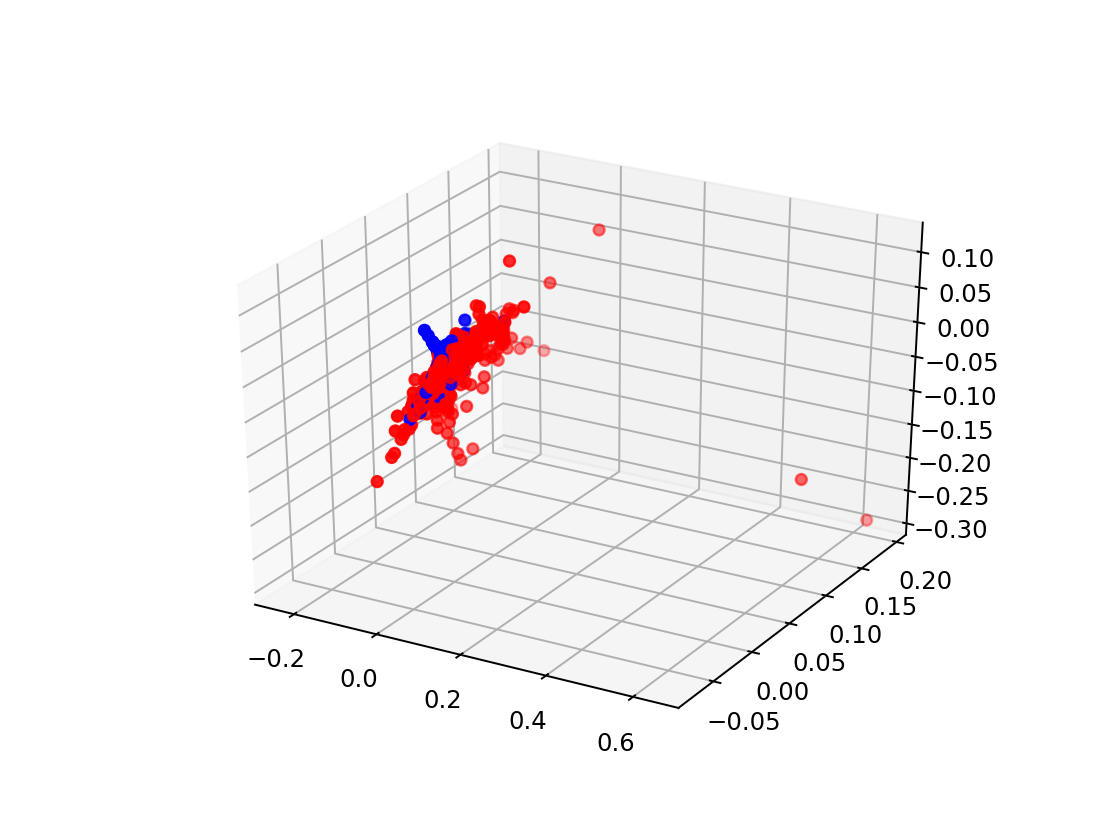

In [21]:
Zlle,err = locally_linear_embedding(Z,n_components=3,n_neighbors=5)
plot_class3(Zlle)

<IPython.core.display.Javascript object>


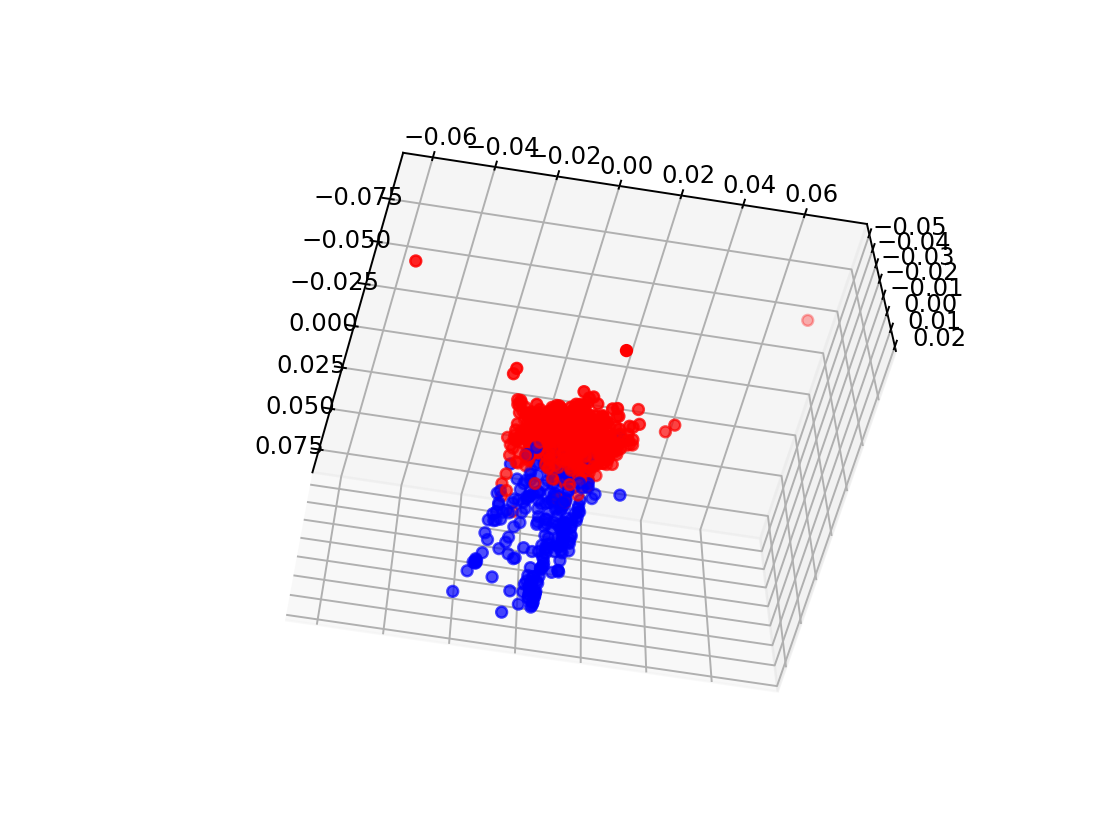

In [22]:
Ziso = Isomap(n_components=3).fit_transform(Z)
plot_class3(Ziso)

<IPython.core.display.Javascript object>


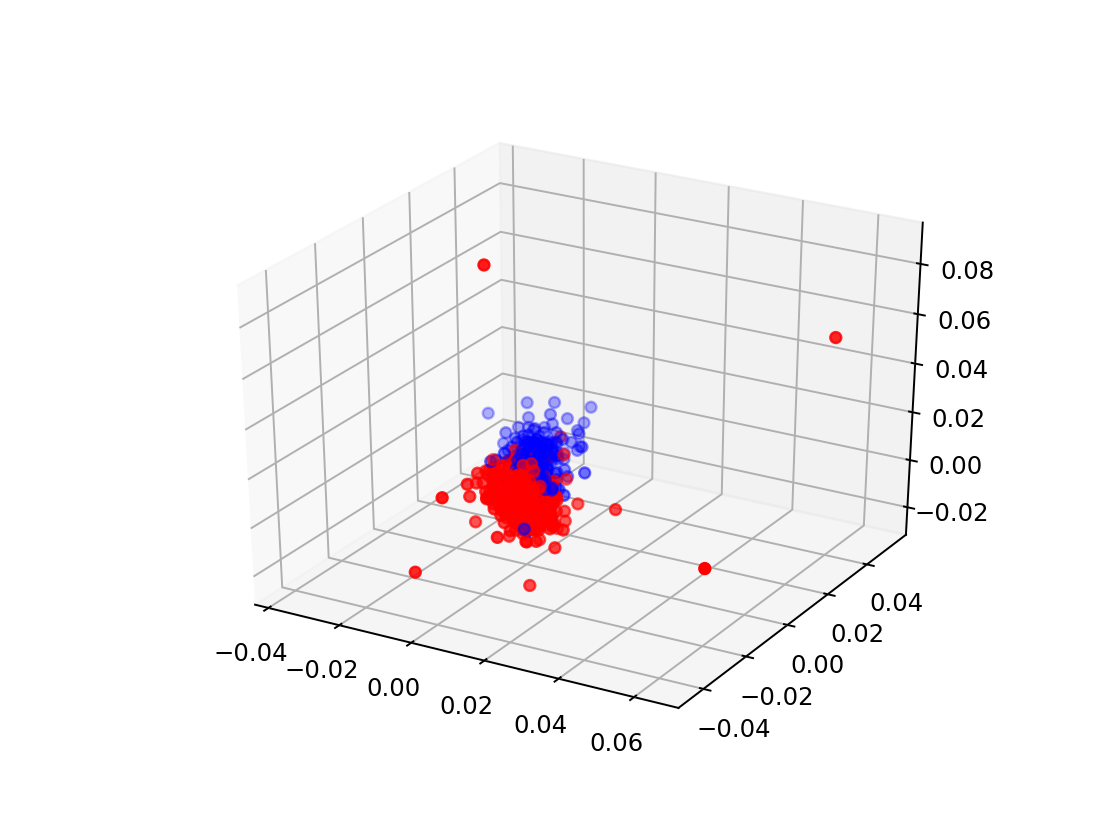

In [23]:
Ziso = MDS(n_components=3).fit_transform(Z)
plot_class3(Ziso)

In [ ]:
tsne, nmf, ica

<IPython.core.display.Javascript object>


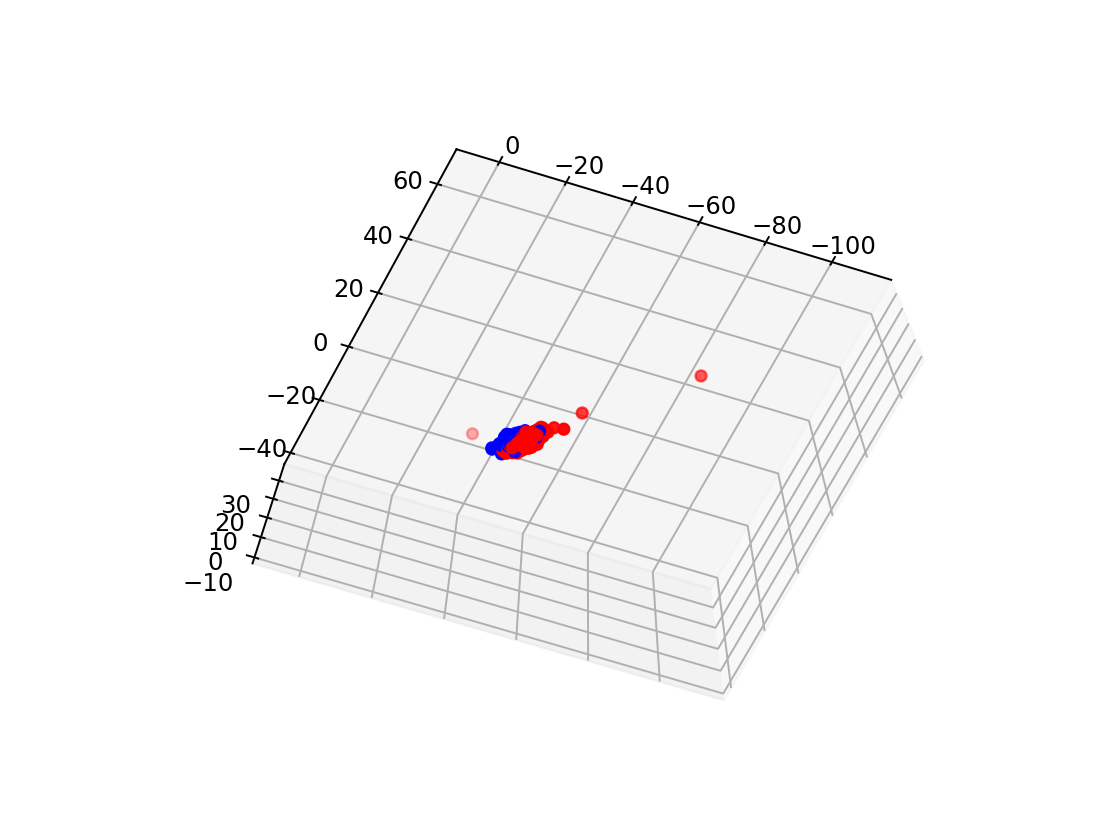

In [25]:
from shogun import Jade,RealFeatures

mixed_signals = RealFeatures((Z.T).astype(np.float64))

# Separating with JADE
jade = Jade()
signals = jade.apply(mixed_signals)

Zjade = signals.get_feature_matrix()

plot_class3(Zjade.T)